# Аналитика в авиакомпании

## 1. Обзор данных

**Библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

**Данные**

In [2]:
df_model_flight = pd.read_csv('query_1.csv')
df_city_flight = pd.read_csv('query_3.csv')

**Таблица самолетов**

In [3]:
display(df_model_flight)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
df_model_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**Таблица городов**

In [5]:
df_city_flight.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
df_city_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Таблица df_model_flight**
- Пропусков нет
- Типы данных корректны
- Дубликатов нет

**Таблица df_city_flight**
- Пропусков нет
- Тип данных столбца average_flights можно заменить на int (нам не нужна точность до 6 знаков после запятой)
- Проверить на дубликаты

## 2. Предобработка

**Типы данных**

Округлим все значения, и столбец автоматически перейдет в int

In [7]:
df_city_flight['average_flights'] = df_city_flight['average_flights'].apply(round)

**Дубликаты**

In [8]:
df_city_flight.duplicated().sum()

0

Готово

## 3. Визуализация и анализ

### Количество рейсов для разных моделей самолетов

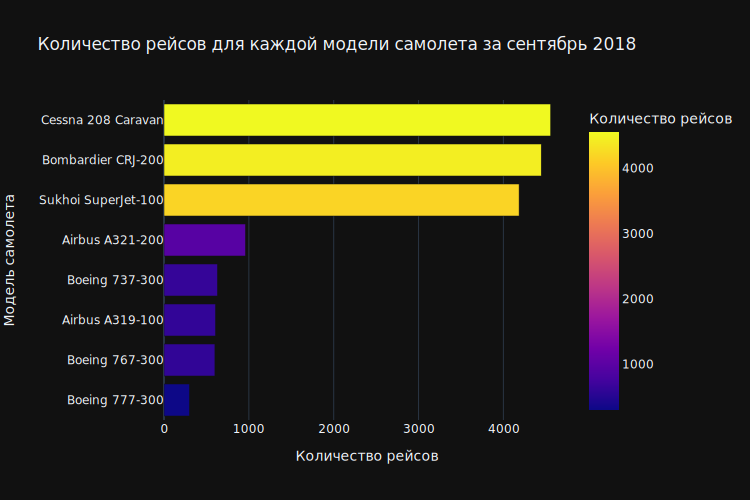

In [9]:
px.bar(df_model_flight.sort_values(by='flights_amount', ascending=True), 
             x="flights_amount", 
             y="model",
             color = 'flights_amount',
             orientation = 'h',
             width=750,
             height=500,
             labels = {'model':'Модель самолета', 'flights_amount':'Количество рейсов'},
             title="Количество рейсов для каждой модели самолета за сентябрь 2018",
             template = 'plotly_dark')

**Выводы:**
- Больше всего рейсов за месяц выполняют самолеты Cessna, Bombardier и Sukhoi
- Они превосходят по количеству полетов в месяц следующие в рейтинге Аэробусы и Боинги аж в 4 раза.  

### Топ-10 городов по количеству рейсов

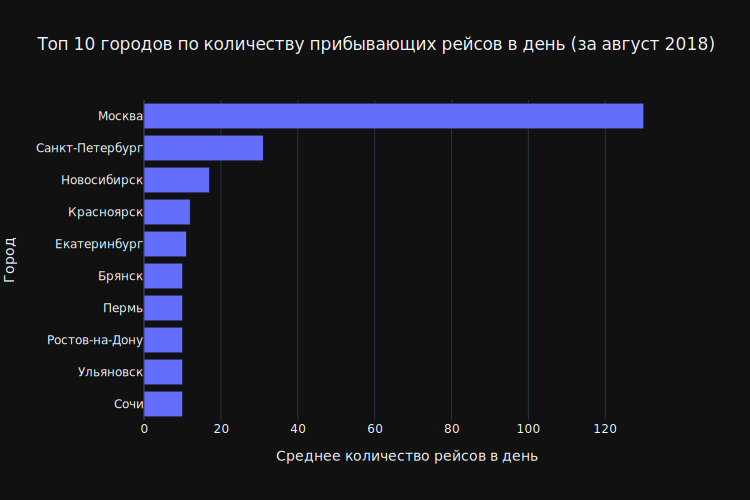

In [10]:
px.bar(df_city_flight.sort_values(by='average_flights', ascending=True).tail(10), 
             x="average_flights", 
             y="city",
             orientation = 'h',
             width=750,
             height=500,
             labels = {'city':'Город', 'average_flights':'Среднее количество рейсов в день'},
             title="Топ 10 городов по количеству прибывающих рейсов в день (за август 2018)",
             template = 'plotly_dark')


**Выводы:**
- Москва с большим отрывом лидирует по количеству прибывающих рейсов (что не удивительно)
- После Санкт-Петербурга в дестяке расположились города, которые можно назвать региональными центрами.

### Города и количество рейсов

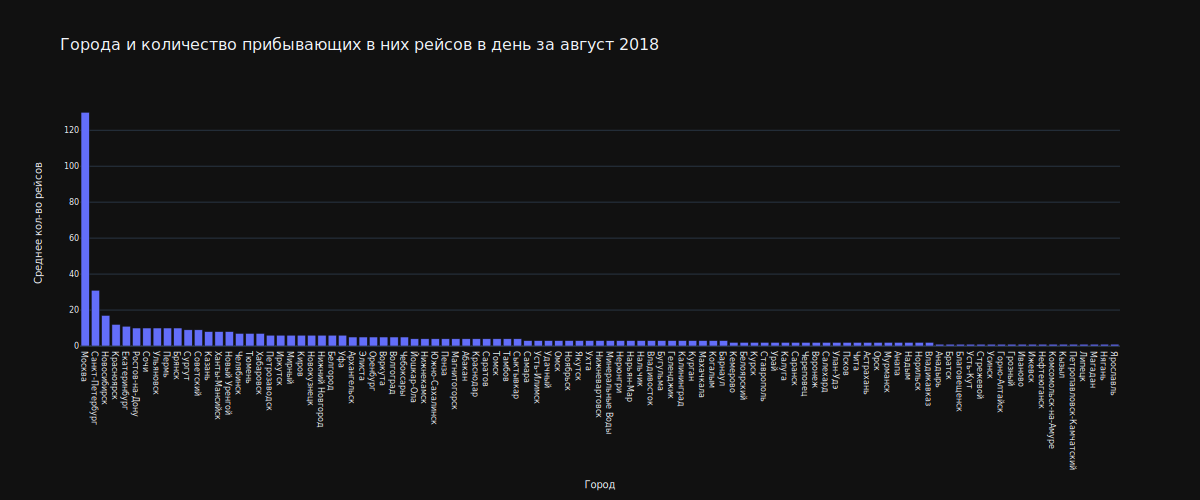

In [11]:
fig = px.bar(df_city_flight.sort_values(by='average_flights', ascending=False),
             y='average_flights',
             x='city',
             title='Города и количество прибывающих в них рейсов в день за август 2018',
             labels={'city':'Город', 'average_flights':'Среднее кол-во рейсов'},
             template = 'plotly_dark')

fig.update_layout(
    font_size=8,
    title_font_size=16,
    width=1200,
    height=500
)

fig.show()

Московский столбик делает масштаб графика неудобным. Посмотрим на график без Москвы, Санкт-Петербурга и Новосибирска

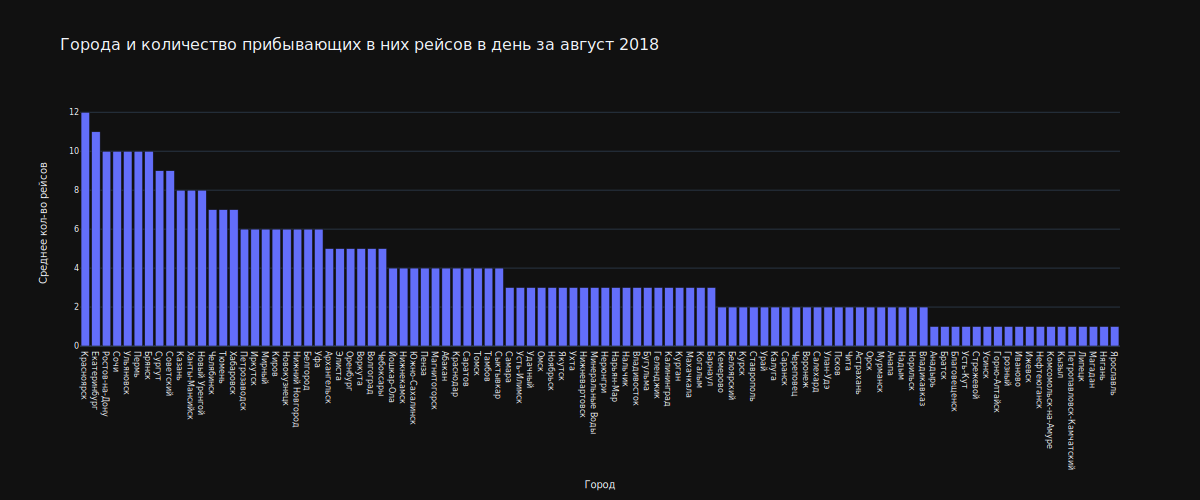

In [12]:
fig = px.bar(df_city_flight.sort_values(by='average_flights', ascending=False).tail(98),
             y='average_flights',
             x='city',
             title='Города и количество прибывающих в них рейсов в день за август 2018',
             labels={'city':'Город', 'average_flights':'Среднее кол-во рейсов'},
             template = 'plotly_dark')

fig.update_layout(
    font_size=8,
    title_font_size=16,
    width=1200,
    height=500
)

fig.show()

Сгруппируем по количеству рейсов и посмотрим по каждому - количество городов (в которые прилетает столько-то самолетов).

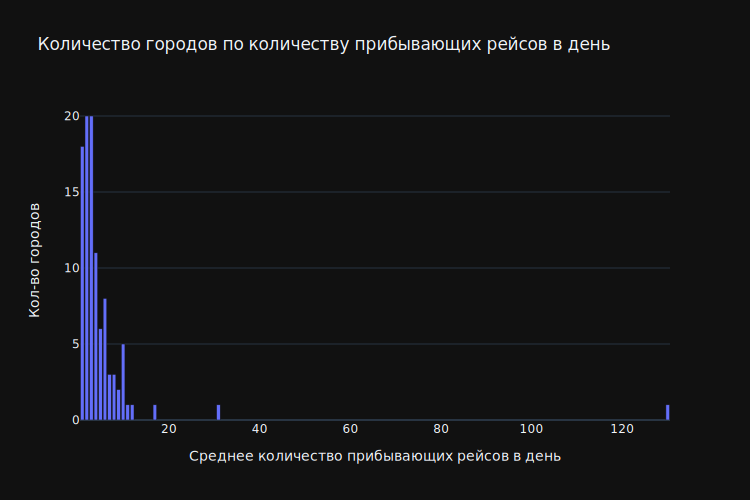

In [13]:
px.bar(df_city_flight.groupby('average_flights')['city'].count().reset_index(), 
             x="average_flights", 
             y="city",
             width=750,
             height=500,
             labels = {'city':'Кол-во городов', 'average_flights':'Среднее количество прибывающих рейсов в день'},
             title="Количество городов по количеству прибывающих рейсов в день",
             template = 'plotly_dark')

**Выводы:**
- За исключением "двух столиц" количество рейсов в день в других городах не превышает 20
- Подавляющее большинство российских городов принимает всего лишь от 1 до 4 рейсов в день

## Выводы

В ходе работы мы проанализировали предпочтения пользователей, покупающих билеты на разные направления.
- Больше всего рейсов за месяц выполняют самолеты Cessna, Bombardier и Sukhoi
- Больше всего рейсов в день принимают аэропорты Москвы, превосходя следующий за ним в рейтинге Санкт-Петербург в 4 раза
- Подавляющее большинство российских городов принимает всего лишь от 1 до 4 рейсов в день